# Task-5  Exploratory Data Analysis - Sports

####  Probelm statement : Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.Suggest teams or players a company should endorse for its products.

#### Importing Libraries and datasets

In [1]:
#import Libraries 
import pandas as pd
import numpy as np

#### Loading first dataset

In [2]:
deliveries = pd.read_csv (r"C:\Users\Milan\Desktop\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Loading Second Dataset

In [3]:
matches = pd.read_csv(r"C:\Users\Milan\Desktop\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
matches.set_index('id', inplace=True)

In [6]:
matches.head(3)

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [7]:
print("Number of Seasons played:", len(matches['season'].unique()))

Number of Seasons played: 12


### Total number of seasons played : 12

#### Removing null values in the city and replace it with Dubai

In [8]:
matches[matches.city.isnull()][['city','venue']]
matches.city = matches.city.fillna('Dubai')

#### Removing null values from umpire1 and umpire2

In [9]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [10]:
matches = matches.drop('umpire3', axis = 1)

In [11]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df.head()

season
city      venue                               
Abu Dhabi Sheikh Zayed Stadium               7
Ahmedabad Sardar Patel Stadium, Motera      12
Bangalore M Chinnaswamy Stadium             66
Bengaluru M Chinnaswamy Stadium              7
          M. Chinnaswamy Stadium             7

## Plotting Graphs

In [12]:
import seaborn as sns
sns.countplot(x='season', data=matches)

## Plot the bar graph of City vs Venue

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

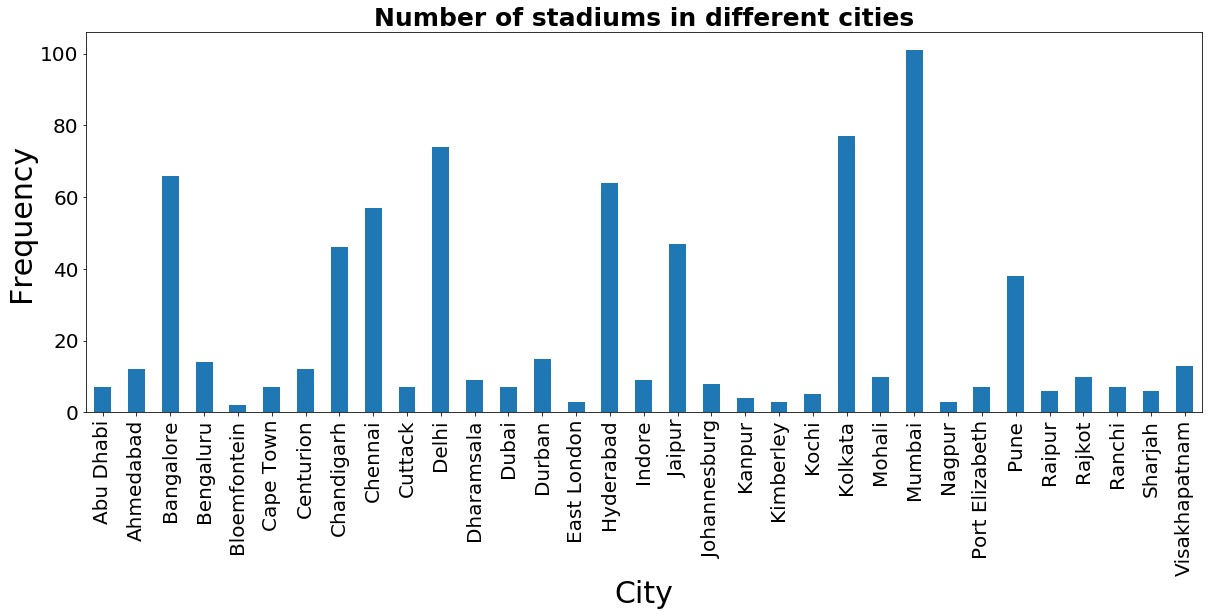

In [15]:

import matplotlib.pyplot as plt
#Plotting venues along with cities 
x = pd.crosstab(matches['city'],matches['venue'])


#Adding a column by summing each columns
x['count'] = x.sum(axis = 'columns')
#We will just keep last column = 'count'
b = x['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)

## Venue where most number of IPL matches held

Text(0.5, 0, 'Frequency')

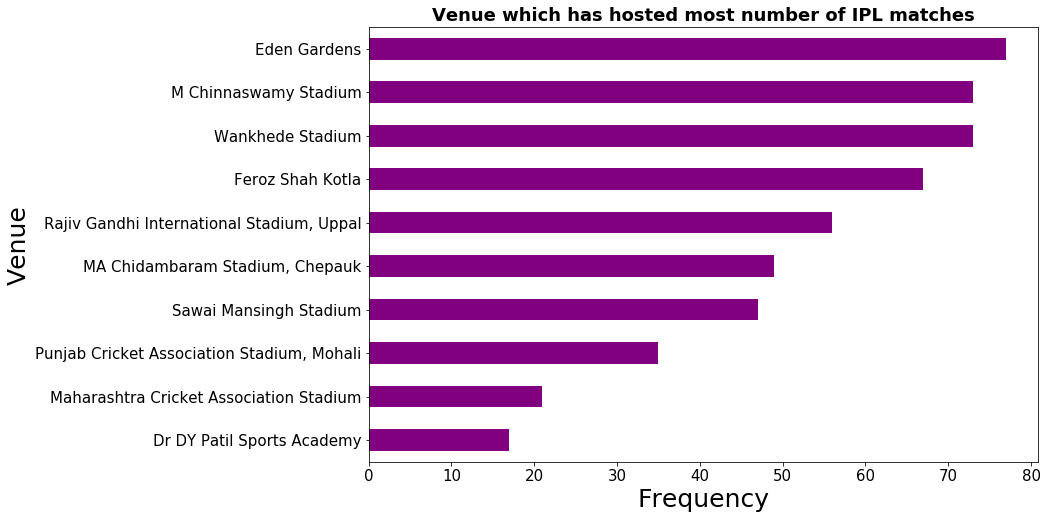

In [16]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='purple')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

### From the above graph we can say that most of the IPL matches was held in Eden Gardens

In [17]:
#Predicting winning teams
winning_teams = matches[['season','winner']]

In [18]:
#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

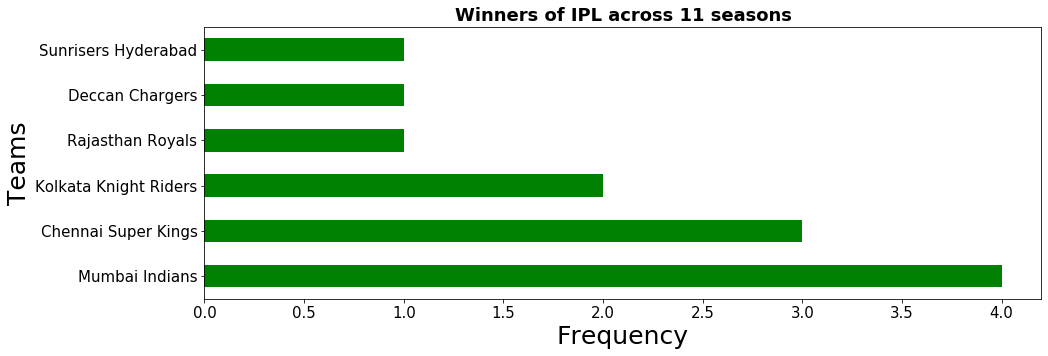

In [19]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'green')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### From the above graph we can say that Mumbai Indians are Winners of IPL across 11 seasons

In [20]:
#merging two datasets
dataset = pd.merge(deliveries,matches, left_on="match_id", right_on="id")
dataset.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

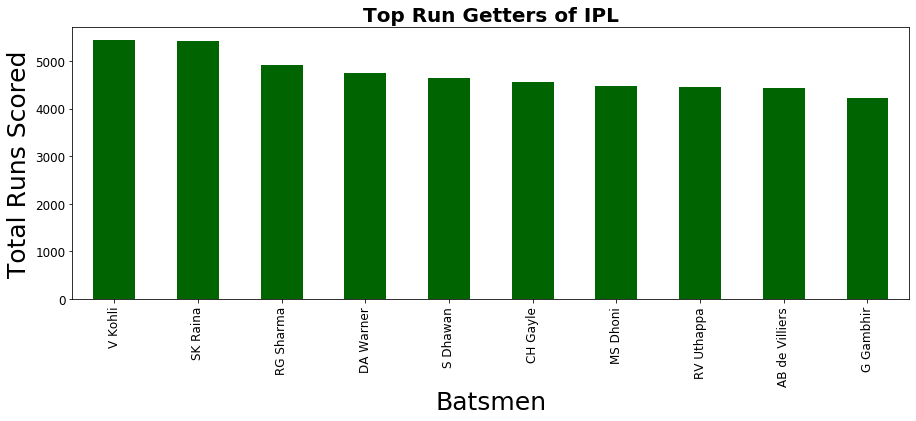

In [21]:
#let's plot the top 10 run getter so far in IPL
dataset.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'darkgreen',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### From this we can say that V Kohli and SK Raina scored more runs compared with remaining players

## Conclusion:
 - Mumbai has more number of stadiums than other cities.
 - Most of the IPL matches was held in Eden Gardens.
 - Most of the IPL matches was won by Mumbai Indians and runner is Chennai Super Kings.
 - Total number of seasons played is 12.